<div style="font-size: 20px">
1. P-T diagram for hydrocarbon misture

<div style="font-size: 16px">
The following data have been collected from a reservoir. The critical temperature and the critical pressure of the reservoir fluid are 252 ℉ and 2500 psia, respectively. The reservoir temperature and pressure are 280 ℉ and 3200 psia, respectively. Further, it was determined that the cricondentherm is at 310 ℉ and the cricondenbar is at 3000 psia.

<div style="font-size: 16px">
(1) Based on the data construct the P-T diagram of the reservoir fluid, and indicate: 1) the dew-point and the bubble-point curves; 2) the liquid and gas phases; 3) the two-phase region; 4) the critical point; and 5) the cricondenbar and the cricondentherm.

In [1]:
# insert your P-T diagram figure here




<div style="font-size: 16px">
(2) Describe the possible paths of phase transition in this phase diagram when recovering reservoir fluid to surface

In [2]:
# write your answer or insert figures here




<div style="font-size: 20px">
2. Plotting bubble point and dew point curves

<img style="float: left;" src="homework5.jpg" width="70%">

<div style="font-size: 20px">
The unit of temperature and pressure for Antoine equation here are ℃ and kPa, respectively

<div style="font-size: 20px">
(1) Plot bubble and dew point curve at given T (Note: We assume ideal mixtures, which means $\gamma_i$=$\Phi_i$=1)



<img style="float: left;" src="homework1.jpg" width="50%">

<img style="float: left;" src="homework2.jpg" width="50%">

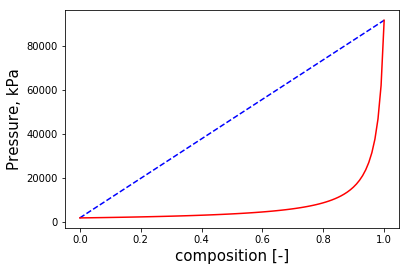

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
C1 = np.array([13.96,2826.26,224.1])     # Antoine coefficients
C2 = np.array([13.9926,3295.12,217.55])  # Antoine coefficients
Tc = 90  # Celcius

# Vapor Pressure Substance 1.
Pv1 = 10**(C1[0] - C1[1]/(Tc + C1[2]))
# Vapor Pressure Substance 2.
Pv2 = 10**(C2[0] - C2[1]/(Tc + C2[2]))


x=np.linspace(0,1,100)  
Pb=x*Pv1+(1-x)*Pv2
y=np.linspace(0,1,100)
Pd=1/(y/Pv1 + (1-y)/Pv2)
plt.plot(x, Pb, 'b--')
plt.plot(y, Pd, 'r')
plt.xlabel('composition [-]',fontsize = 15)
plt.ylabel('Pressure, kPa',fontsize = 15)
plt.show()

<div style="font-size: 20px">
(2) Plot bubble and dew point curve at given P (Note: We assume ideal mixtures, which means $\gamma_i$=$\Phi_i$=1)


<img style="float: left;" src="homework3.jpg" width="50%">

<img style="float: left;" src="homework4.jpg" width="50%">

In [4]:
import numpy as np
C1 = np.array([13.96,2826.26,224.1])     # Antoine coefficients
C2 = np.array([13.9926,3295.12,217.55])  # Antoine coefficients
P = 90      # kPa
y = np.linspace(0,1,100)   # composition range
T1 = 10     # min T
T2 = 200    # max T
tol = 1e-7  # tolerance  

In [5]:
def obj(T, y):
    return 1/P - y/(10**(C1[0] - C1[1]/(T + C1[2]))) - (1 - y)/(10**(C2[0] - C2[1]/(T + C2[2])))

In [6]:
def bisection(a,b,y):
    while (np.abs(a-b)>tol):
        T = (a + b)/2
        r_left = obj(a, y)
        r_right = obj(b, y)
        r_mid = obj(T, y)
        if (r_left*r_mid<0):
            b = T
        else:
            a = T
    return T

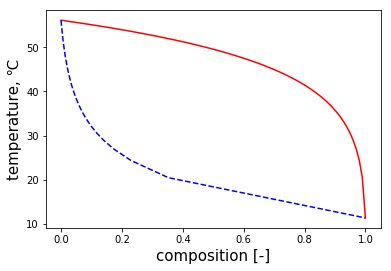

In [7]:
Td = np.zeros(len(y))
x = np.zeros(len(y))
for i in range (len(y)):
    Td[i] = bisection(T1,T2,y[i])
    Psat = 10**(C1[0] - C1[1]/(Td[i] + C1[2]))
    x[i] = y[i] * P / Psat

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(y,Td,'r')
plt.plot(x,Td,'b--')
plt.xlabel('composition [-]',fontsize = 15)
plt.ylabel('temperature, ℃',fontsize = 15)
plt.show()